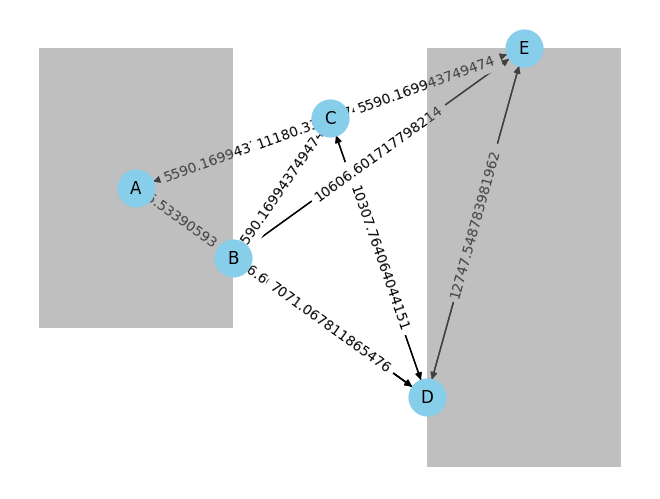

Shortest distances from node A :
A -> A: 0.00
A -> B: 3535.53
A -> C: 5590.17
A -> D: 10606.60
A -> E: 11180.34


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
from shapely.geometry import LineString, Polygon

# Coordinates of antennas (stars) extracted from the image
antennas = {
    'A': (50, 125),
    'B': (75, 100),
    'C': (100, 150),
    'D': (125, 50),
    'E': (150, 175)
}

# Define obstacles as polygons (rectangles)
obstacles = [
    Polygon([(25, 75), (25, 175), (75, 175), (75, 75)]),
    Polygon([(125, 25), (125, 175), (175, 175), (175, 25)])
]

# Calculate Euclidean distance between two points
def euclidean_distance(coord1, coord2):
    return np.sqrt((coord1[0] - coord2[0])**2 + (coord1[1] - coord2[1])**2)

# Check if the line between two points intersects any obstacle
def intersects_obstacle(coord1, coord2, obstacles):
    line = LineString([coord1, coord2])
    for obstacle in obstacles:
        if line.intersects(obstacle):
            return True
    return False

# Create a directed graph
G = nx.DiGraph()

# Add nodes
for antenna in antennas:
    G.add_node(antenna, pos=antennas[antenna])

# Add edges with weights (distances)
for start in antennas:
    for end in antennas:
        if start != end:
            distance = euclidean_distance(antennas[start], antennas[end])
            if intersects_obstacle(antennas[start], antennas[end], obstacles):
                distance *= 100  # Assign a very high cost to paths through obstacles
            G.add_edge(start, end, weight=distance)

# Draw the graph
pos = nx.get_node_attributes(G, 'pos')
nx.draw(G, pos, with_labels=True, node_size=700, node_color='skyblue')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

# Draw obstacles
for obstacle in obstacles:
    x, y = obstacle.exterior.xy
    plt.fill(x, y, alpha=0.5, fc='gray', ec='none')

plt.show()

# Applying Dijkstra's algorithm
source_node = 'A'
distances = nx.single_source_dijkstra_path_length(G, source_node)

print("Shortest distances from node", source_node, ":")
for target, distance in distances.items():
    print(f"{source_node} -> {target}: {distance:.2f}")


In [2]:
from shapely.geometry import Polygon, Point, LineString
import networkx as nx
import matplotlib.pyplot as plt

def plot_polygon_and_path(polygon, path, G):
    fig, ax = plt.subplots()
    
    # Plot the polygon
    x, y = polygon.exterior.xy
    ax.plot(x, y, 'k-')

    # Plot the graph edges
    for edge in G.edges:
        x_coords, y_coords = zip(*edge)
        ax.plot(x_coords, y_coords, 'b--', alpha=0.5)

    # Plot the shortest path
    path_coords = list(path)
    path_line = LineString(path_coords)
    x, y = path_line.xy
    ax.plot(x, y, 'r-', linewidth=2, label='Shortest Path')

    # Plot the start and end points
    ax.plot(*path_coords[0], 'go', label='Start Point')
    ax.plot(*path_coords[-1], 'ro', label='End Point')

    plt.legend()
    plt.show()

# Example usage
# Define the polygon
poly_coords = [(0, 0), (4, 0), (4, 4), (0,4), (1.5, 2), (0, 0)]
polygon = Polygon(poly_coords)

# Define start and end points
start_point = (1, 1)
end_point = (0.5, 3.5)

# Find the shortest path
path, G = shortest_path_in_polygon(polygon, start_point, end_point)
print("Shortest path:", path)

# Visualize the polygon and the shortest path
plot_polygon_and_path(polygon, path, G)


NameError: name 'shortest_path_in_polygon' is not defined

Shortest path: [(128, 67), (137.5, 78.5368731693332), (202.0500065892207, 101.39499120093163), (200, 110)]


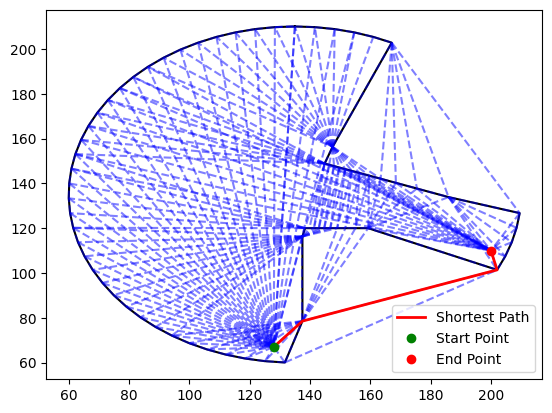

In [ ]:
from shapely.geometry import Polygon, Point, LineString
from shapely.ops import triangulate
import networkx as nx
from scipy.spatial import Delaunay
import matplotlib.pyplot as plt

def triangulate_polygon(polygon):
    return triangulate(polygon)

def create_graph_from_triangulation(triangles):
    G = nx.Graph()
    for triangle in triangles:
        coords = list(triangle.exterior.coords)[:-1]  # Ignore the repeated last point
        for i, p1 in enumerate(coords):
            for j, p2 in enumerate(coords):
                if i != j:
                    G.add_edge(tuple(p1), tuple(p2), weight=Point(p1).distance(Point(p2)))
    return G

def shortest_path_in_polygon(polygon, start, end):
    triangles = triangulate_polygon(polygon)
    G = create_graph_from_triangulation(triangles)
    G.add_node(tuple(start))
    G.add_node(tuple(end))

    for node in G.nodes:
        if is_visible(start, node, polygon):
            G.add_edge(tuple(start), node, weight=Point(start).distance(Point(node)))
        if is_visible(end, node, polygon):
            G.add_edge(tuple(end), node, weight=Point(end).distance(Point(node)))

    start = tuple(start)
    end = tuple(end)
    path = nx.shortest_path(G, source=start, target=end, weight='weight')
    return path, G

def is_visible(p1, p2, polygon):
    line = LineString([p1, p2])
    return polygon.contains(line) or polygon.touches(line)

def plot_polygon_and_path(polygon, path, G):
    fig, ax = plt.subplots()

    # Plot the polygon
    x, y = polygon.exterior.xy
    ax.plot(x, y, 'k-')

    # Plot the graph edges
    for edge in G.edges:
        x_coords, y_coords = zip(*edge)
        ax.plot(x_coords, y_coords, 'b--', alpha=0.5)

    # Plot the shortest path
    path_coords = list(path)
    path_line = LineString(path_coords)
    x, y = path_line.xy
    ax.plot(x, y, 'r-', linewidth=2, label='Shortest Path')

    # Plot the start and end points
    ax.plot(*path_coords[0], 'go', label='Start Point')
    ax.plot(*path_coords[-1], 'ro', label='End Point')

    plt.legend()
    plt.show()

# Example usage
# Define the polygon
poly_coords = [(0, 0), (4, 0), (4, 4), (0,4), (1.5, 2), (0, 0)]
polygon = Polygon(poly_coords)

import pickle
with open("pg.pkl", "rb") as f:
    polygon=pickle.load(f)

# Define start and end points
start_point = (128,67)
end_point = (200, 110)

# Find the shortest path
path, G = shortest_path_in_polygon(polygon, start_point, end_point)
print("Shortest path:", path)

# Visualize the polygon and the shortest path
plot_polygon_and_path(polygon, path, G)


Shortest path: [(128, 67), (137.5, 116.2774146924229), (138.37380982366892, 120.0), (139.80052159090698, 120.0), (141.3106266949102, 120.0), (142.9378427551468, 120.0), (144.72539432054907, 120.0), (146.7311651206027, 120.0), (149.03606012738922, 120.0), (151.75833850447367, 120.0), (155.07971303417088, 120.0), (159.29642016243923, 120.0), (200, 110)]


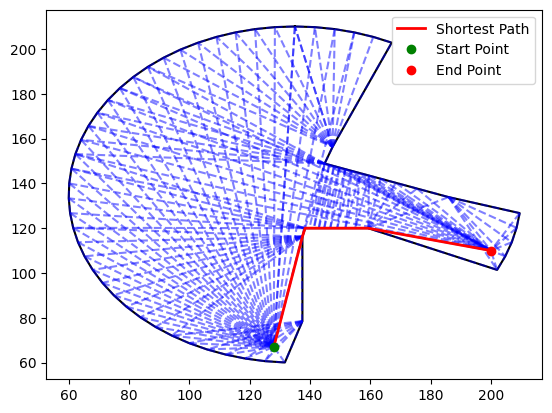

In [3]:
import triangle
from shapely.geometry import Polygon, Point, LineString
import networkx as nx
import matplotlib.pyplot as plt

def cdt_triangulate(polygon):
    coords = list(polygon.exterior.coords)
    segments = [(i, (i+1) % len(coords)) for i in range(len(coords)-1)]
    A = {'vertices': coords, 'segments': segments}
    B = triangle.triangulate(A, 'p')
    triangles = [Polygon(B['vertices'][triangle]) for triangle in B['triangles']]
    return triangles

def create_graph_from_triangulation(triangles):
    G = nx.Graph()
    for triangle in triangles:
        coords = list(triangle.exterior.coords)[:-1]  # Ignore the repeated last point
        for i, p1 in enumerate(coords):
            for j, p2 in enumerate(coords):
                if i != j:
                    G.add_edge(tuple(p1), tuple(p2), weight=Point(p1).distance(Point(p2)))
    return G

def shortest_path_in_polygon(polygon, start, end):
    triangles = cdt_triangulate(polygon)
    G = create_graph_from_triangulation(triangles)
    G.add_node(tuple(start))
    G.add_node(tuple(end))

    for node in G.nodes:
        if is_visible(start, node, polygon):
            G.add_edge(tuple(start), node, weight=Point(start).distance(Point(node)))
        if is_visible(end, node, polygon):
            G.add_edge(tuple(end), node, weight=Point(end).distance(Point(node)))

    start = tuple(start)
    end = tuple(end)
    path = nx.shortest_path(G, source=start, target=end, weight='weight')
    return path, G

def is_visible(p1, p2, polygon):
    line = LineString([p1, p2])
    return polygon.contains(line) or polygon.touches(line)

def plot_polygon_and_path(polygon, path, G):
    fig, ax = plt.subplots()

    # Plot the polygon
    x, y = polygon.exterior.xy
    ax.plot(x, y, 'k-')

    # Plot the graph edges
    for edge in G.edges:
        x_coords, y_coords = zip(*edge)
        ax.plot(x_coords, y_coords, 'b--', alpha=0.5)

    # Plot the shortest path
    path_coords = list(path)
    path_line = LineString(path_coords)
    x, y = path_line.xy
    ax.plot(x, y, 'r-', linewidth=2, label='Shortest Path')

    # Plot the start and end points
    ax.plot(*path_coords[0], 'go', label='Start Point')
    ax.plot(*path_coords[-1], 'ro', label='End Point')

    plt.legend()
    plt.show()

# Example usage
# Define the polygon
poly_coords = [(0, 0), (4, 0), (4, 4), (0,4), (1.5, 2), (0, 0)]
polygon = Polygon(poly_coords)

import pickle
with open("pg.pkl", "rb") as f:
    polygon=pickle.load(f)

# Define start and end points
start_point = (128,67)
end_point = (200, 110)

# Find the shortest path
path, G = shortest_path_in_polygon(polygon, start_point, end_point)
print("Shortest path:", path)

# Visualize the polygon and the shortest path
plot_polygon_and_path(polygon, path, G)
